In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b4151edaeec64cf3bb04660df3e37c8d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NPCIhwBqs4ZgI9daIkiMeWS26VsbrDdta1-XNOIfAjYQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_b4151edaeec64cf3bb04660df3e37c8d.get_object(Bucket='telecomcustomerchurnprediction-donotdelete-pr-9vrlchcmhige1v',Key='WA_Fn-UseC_-Telco-Customer-Churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
data = pd.read_csv(body)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [5]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [6]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [7]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [8]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

<AxesSubplot:>

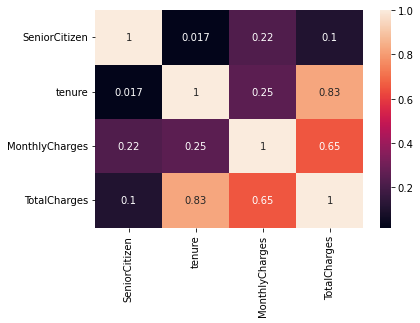

In [9]:
sns.heatmap(data.corr(),annot=True)

In [10]:
data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

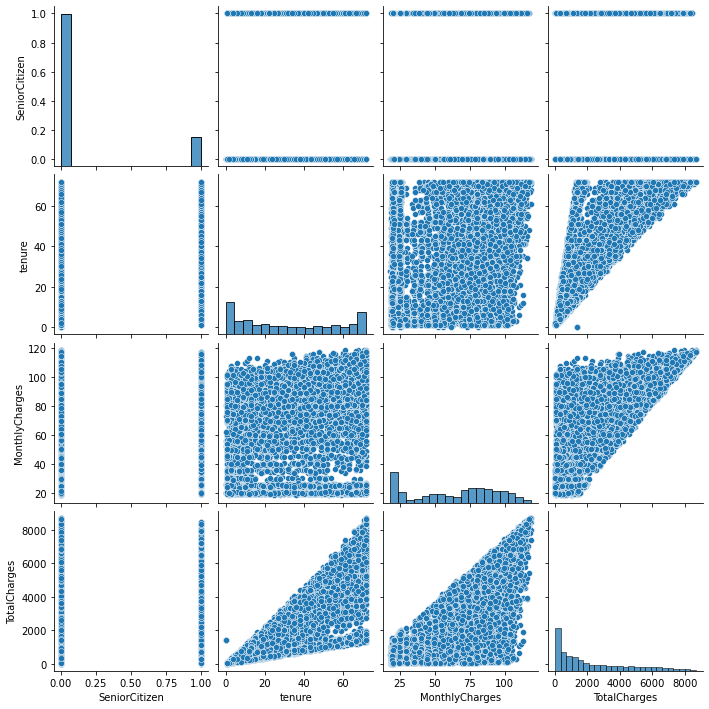

In [11]:
sns.pairplot(data=data,markers=["^","v"],palette="inferno")

In [12]:
data.corr()

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102652
tenure               0.016567  1.000000        0.247900      0.825464
MonthlyCharges       0.220173  0.247900        1.000000      0.650864
TotalCharges         0.102652  0.825464        0.650864      1.000000

In [13]:
data.shape

(7043, 21)

In [14]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [19]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [21]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
data['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
data['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [24]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [25]:
data['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
data['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [30]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
data['gender']=le.fit_transform(data['gender'])
data['Partner']=le.fit_transform(data['Partner'])

In [33]:
data['Dependents']=le.fit_transform(data['Dependents'])
data['MultipleLines']=le.fit_transform(data['MultipleLines'])
data['PhoneService']=le.fit_transform(data['PhoneService'])
data['InternetService']=le.fit_transform(data['InternetService'])
data['OnlineSecurity']=le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=le.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=le.fit_transform(data['DeviceProtection'])
data['TechSupport']=le.fit_transform(data['TechSupport'])
data['StreamingTV']=le.fit_transform(data['StreamingTV'])
data['StreamingMovies']=le.fit_transform(data['StreamingMovies'])
data['Contract']=le.fit_transform(data['Contract'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])
data['Churn']=le.fit_transform(data['Churn'])

In [34]:
data


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 21 columns]

In [35]:
data.drop(columns='customerID', inplace=True)

In [36]:
x=data.iloc[:,:19].values


In [37]:
data['Churn'].value_counts() 

0    5174
1    1869
Name: Churn, dtype: int64

In [38]:
x.shape

(7043, 19)

In [39]:
y=data.iloc[:,19:20].values

In [40]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [41]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
i= one.fit_transform(x[:,14:15]).toarray()
j= one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13,14,16], axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x), axis=1)

In [42]:
x.shape

(7043, 40)

In [43]:
!conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.9

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1



imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smt = SMOTE()

x_resample, y_resample = smt.fit_resample(x,y)

In [46]:
x_resample.shape

(10348, 40)

In [47]:
y_resample

array([0, 0, 1, ..., 1, 1, 1])

In [48]:
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
1                    0              3           56.95       1889.50      0  
2                    1              3           53.85        108.15      1  
3                    0              0           42.30       1840.75      0  
4                    1              2           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              3           84.80       1990.50      0  
7039                 1              1          103.20       7362.90      0  
7040                 1              2           29.60        346.45      0  
7041                 1              3           74.40        306.60      1  
7042                 1              0          105.65       6844.50      0  

[7043 rows x 20 columns]

In [49]:
x_resample.shape

(10348, 40)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size = 0.2, random_state=0)

In [51]:
print(x_train.shape)

(8278, 40)


In [52]:
print(x_test.shape)

(2070, 40)


In [53]:
print(y_train.shape)

(8278,)


In [54]:
print(y_test.shape)

(2070,)


In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 40)
(2070, 40)
(8278,)
(2070,)


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [57]:
x_train

array([[-0.32668254, -0.32151295,  0.51587428, ...,  0.7662926 ,
         0.48481543, -0.89761828],
       [ 1.09281225, -0.32151295, -0.90843392, ..., -1.40683163,
         0.42954446,  0.46521175],
       [-0.98533528, -0.32151295,  1.17676046, ..., -1.40683163,
        -1.52559294, -0.12716583],
       ...,
       [ 1.09281225, -0.32151295, -0.90843392, ...,  0.7662926 ,
         0.80493084, -0.4936076 ],
       [ 1.09281225, -0.32151295, -0.90843392, ...,  0.7662926 ,
         0.04247051, -0.78883899],
       [ 1.09281225, -0.32151295, -0.90843392, ..., -1.40683163,
        -1.65245963, -0.8918452 ]])

In [58]:
x_test

array([[-1.00352452, -0.31987883,  1.19626554, ...,  0.7661108 ,
        -0.28205165, -0.91430431],
       [ 1.07247296, -0.31987883, -0.89177468, ...,  0.7661108 ,
        -1.72025736, -0.78090177],
       [ 1.07247296, -0.31987883, -0.89177468, ..., -1.41423094,
         0.5663102 ,  0.24332828],
       ...,
       [-1.00352452, -0.31987883,  1.19626554, ..., -1.41423094,
         0.43792922,  0.83133145],
       [ 1.07247296, -0.31987883, -0.89177468, ...,  0.7661108 ,
        -1.68689239, -0.85256276],
       [-1.00352452, -0.31987883,  1.19626554, ..., -0.17897879,
         0.23922825, -0.80041618]])

# Model Building

In [59]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [60]:
svm_pred=svm.predict(x_test)
svm_pred

array([1, 0, 1, ..., 1, 0, 1])

In [61]:
from sklearn.metrics import accuracy_score
svm_acc=accuracy_score(svm_pred,y_test)
svm_acc

0.7671497584541063

In [62]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(svm_pred,y_test)
svm_cm

array([[721, 170],
       [312, 867]])

In [63]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,svm_pred)
roc_auc=metrics.auc(fpr,tpr)

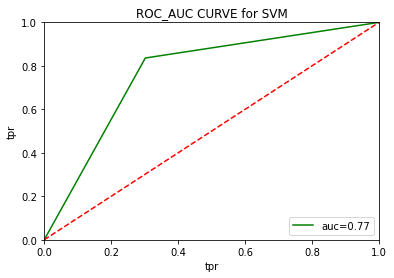

In [64]:
import matplotlib.pyplot as plt
plt.title("ROC_AUC CURVE for SVM")
plt.plot(fpr,tpr,'g',label='auc=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('tpr')
plt.legend(loc='lower right')

In [65]:
import pickle
pickle.dump(svm,open('churnnew.pkl','wb'))

In [66]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 28.2 MB/s eta 0:00:01     |██████████████                  | 757 kB 28.2 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.208
    Uninstalling ibm-watson-machine-learning-1.0.208:
      Successfully uninstalled ibm-watson-machine-learning-1.0.208


In [67]:
from ibm_watson_machine_learning import APIClient

In [68]:
import json


In [69]:
wml_credentials={
    "apikey":"8Pn2f3_cLL7rOoT1z1ikPR2_ZvL46loOm2ky22J6Ff3g",
    "url":"https://us-south.ml.cloud.ibm.com"
}


In [70]:
wml_client=APIClient(wml_credentials)

In [71]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------  ------------------------
ID                                    NAME                 CREATED
bc209b4d-2778-4094-9595-7af76ee5c6cc  Telecom Churn model  2022-05-29T13:29:27.171Z
------------------------------------  -------------------  ------------------------


In [72]:
SPACE_ID= "bc209b4d-2778-4094-9595-7af76ee5c6cc"

In [73]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [74]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [75]:
import sklearn
sklearn.__version__

'1.0.2'

In [96]:
MODEL_NAME='Telecom Churn Model'
DEPLOYMENT_NAME='Telecom_deploy'
DEMO_MODEL=svm

In [97]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')


In [98]:
model_props={
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [99]:
model_details=wml_client.repository.store_model(
   model=DEMO_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [100]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'},
      {'name': 

In [101]:
model_id=wml_client.repository.get_model_id(model_details)

In [102]:
model_id

'fbc3ce41-f19b-4f6d-8f38-619504951089'

In [103]:
#Set meta
deployment_props={
    wml_client.deployments.ConfigurationMetaNames:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
    
}

In [ ]:
deployment=wml_client.deployments.create(
  artifact_uid= model_id,
  meta_props=deployment_props  
)



#######################################################################################

Synchronous deployment creation for uid: 'fbc3ce41-f19b-4f6d-8f38-619504951089' started

#######################################################################################


initializing